### **Submitted By**
- Prathik B Shetty

PS: Nibhashree helped me figure out few of the codes.

### **Install packages , Load required libraries and load data**

**Load packages**

In [1]:
# Package for ggplot2 enhancements
install.packages("ggExtra")

# Package for multivariate normal distribution
install.packages('mvtnorm')

Installing package into 'D:/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\killua\AppData\Local\Temp\RtmpUjkeEv\downloaded_packages


Installing package into 'D:/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'mvtnorm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\killua\AppData\Local\Temp\RtmpUjkeEv\downloaded_packages


**Load essential libraries**

In [2]:
library(ggplot2) # library for plotting
library(dplyr) # library for data wrangling
library(ggExtra) # library for enhanced ggplot2 plots
library(mvtnorm) # library for multivariate normal distribution
library(tidyr) # library to reorganize data


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggExtra' was built under R version 4.1.3"


**Load Data**

In [3]:
# Load RData file data2.RData
load(url('https://tinyurl.com/527nxn23'))
str(data2)

List of 3
 $ X   : num [1:1000, 1:11] 6.65 -5.63 9.72 -4.64 -12.84 ...
 $ Xval: num [1:100, 1:11] 18.27 -3.19 -5.26 12.95 3.76 ...
 $ yval: num [1:100, 1] 1 0 0 1 0 0 0 0 0 0 ...
 - attr(*, "header")=List of 3
  ..$ description: chr "MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 23:12:48 2011                                                "
  ..$ version    : chr "5"
  ..$ endian     : chr "little"


### **Training Data and Validation Data**

In [4]:
# Training data
X_train = data2$X # training data as matrix (all samples here are non-anomalous)
df_train = as.data.frame(X_train) # training data frame
head(X_train, n = 5)

6.653114,13.689702,17.552845,-11.933497,-5.756409,15.435921,-12.1367520,8.2241226,-4.8840241,5.3493353,17.351372352
-5.630542,-18.937667,18.644624,-6.155825,-25.988864,15.409553,-16.5955163,9.4546537,-2.8771734,-6.0094204,19.210636116
9.721525,-9.982489,15.571434,-32.224266,-5.595799,24.321383,0.8327735,10.7945546,0.7275748,10.3929750,7.085994903
-4.635766,-10.716040,20.356571,-9.002097,-4.920569,-4.261957,-1.3058288,0.9499803,-8.6341066,0.1984454,0.006771413
-12.841044,-20.388313,9.491936,-7.038500,-9.921087,-3.716105,-9.3847304,-2.3255336,-13.5185624,11.0070290,14.003210283


In [5]:
# Validation data
X_validate = data2$Xval # validation data as matrix
y_validate = data2$yval # validation data labels
df_validate = as.data.frame(X_validate) # validation data frame
head(y_validate, n = 5) # 1 represents an outlier sample, 0 represents a regular sample

1
0
0
1
0


- Below cell gives us fraction of servers that are outliers in the validation set.
- Here 10% of the servers in the validation set are outliers.
- Out of 1000 servers there would be approximately 100 servers who are outliers.

In [6]:
# Fraction of servers that are outliers in the validation set
mean(y_validate == 1)  # supervised algorithms have to address such class imbalance

[1] 0.1

- Convert the dataframe to long dataframe.
- 

In [7]:
# Wide to long dataframe containing training data
df_gather_train = gather(as.data.frame(X_train))
colnames(df_gather_train) = c('Variable', 'Value')
head(df_gather_train, n = 5)

,Variable,Value
,<chr>,<dbl>
1,V1,6.653114
2,V1,-5.630542
3,V1,9.721525
4,V1,-4.635766
5,V1,-12.841044


In [8]:
# Wide to long dataframe containing validation data
df_gather_validate = gather(as.data.frame(X_validate))
colnames(df_gather_validate) = c('Variable', 'Value')
head(df_gather_validate, n = 5)

,Variable,Value
,<chr>,<dbl>
1,V1,18.271283
2,V1,-3.193070
3,V1,-5.256678
4,V1,12.953176
5,V1,3.763819


###  **Distribution of Variables in Training and Validation Data**

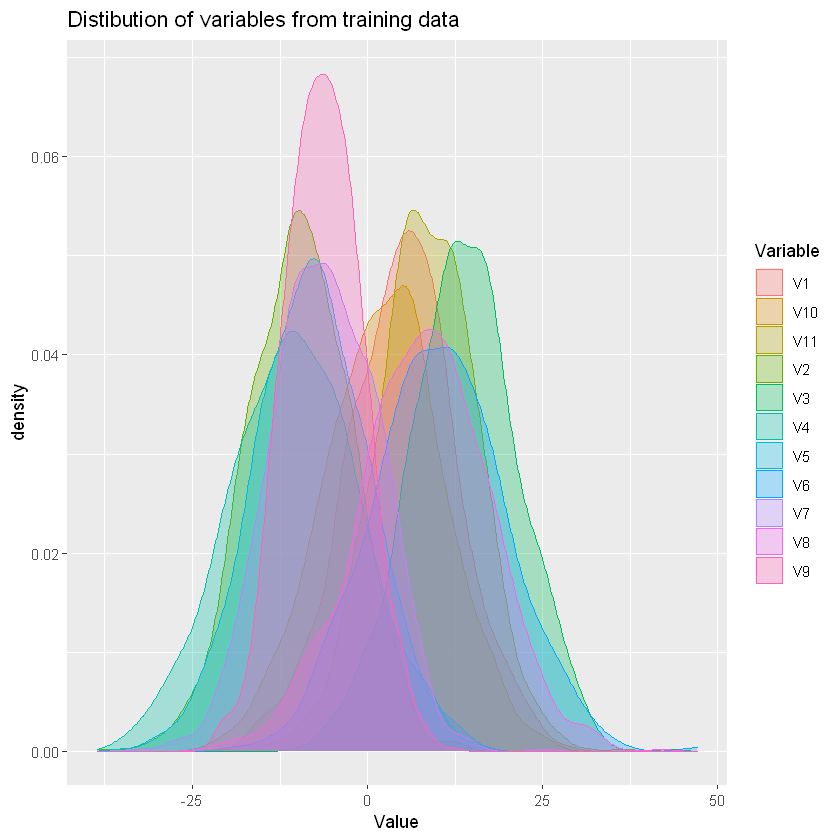

In [11]:
# Separate density plots for each variable (or features) in the training data
df_gather_train %>% ggplot(aes(x = Value, fill = Variable, color = Variable)) +
geom_density(alpha = 0.3)+ggtitle('Distibution of variables from training data')

# Separate density plots for each variable (or features) in the training data
df_gather_train %>% ggplot(aes(x = Value, fill = Variable, color = Variable)) +
geom_density(alpha = 0.3)+ggtitle('Distibution of variables from training data')




**Which variable appears the least normally disributed?**
- Hard to make out since all the plots are overlapping.
- V11 appears the least normally distributed

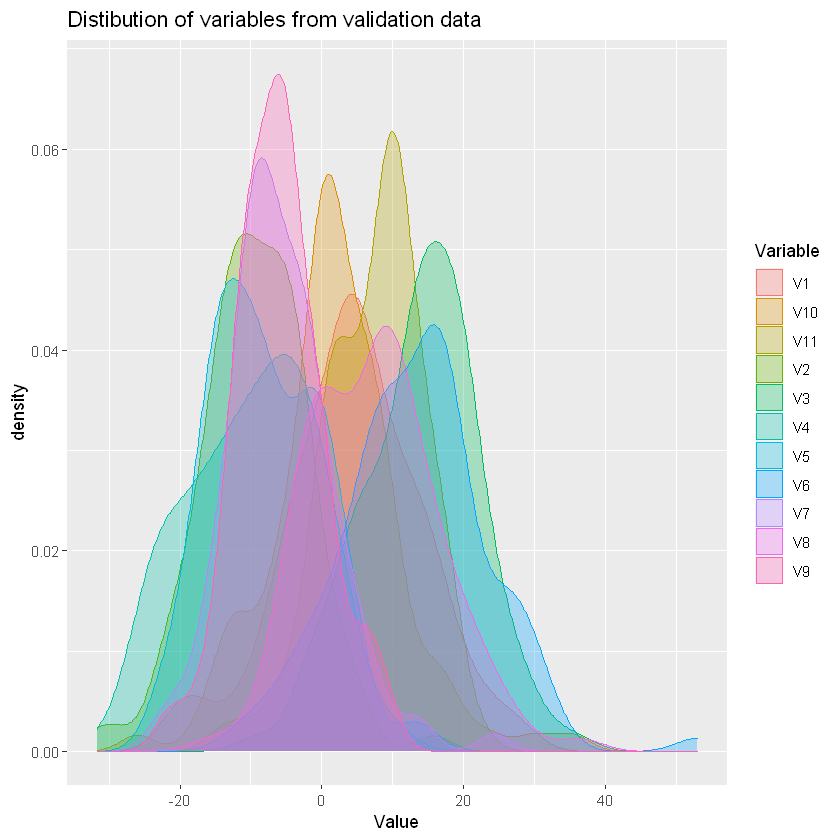

In [12]:
# Separate density plots for each variable (or features) in the validation data
df_gather_validate %>% ggplot(aes(x = Value, fill = Variable, color = Variable)) +
geom_density(alpha = 0.3)+ggtitle('Distibution of variables from validation data')

# Which variable appears the least normally disributed?

**Which variable appears the least normally disributed?**
- V6 or V5 appears the least normally distributed

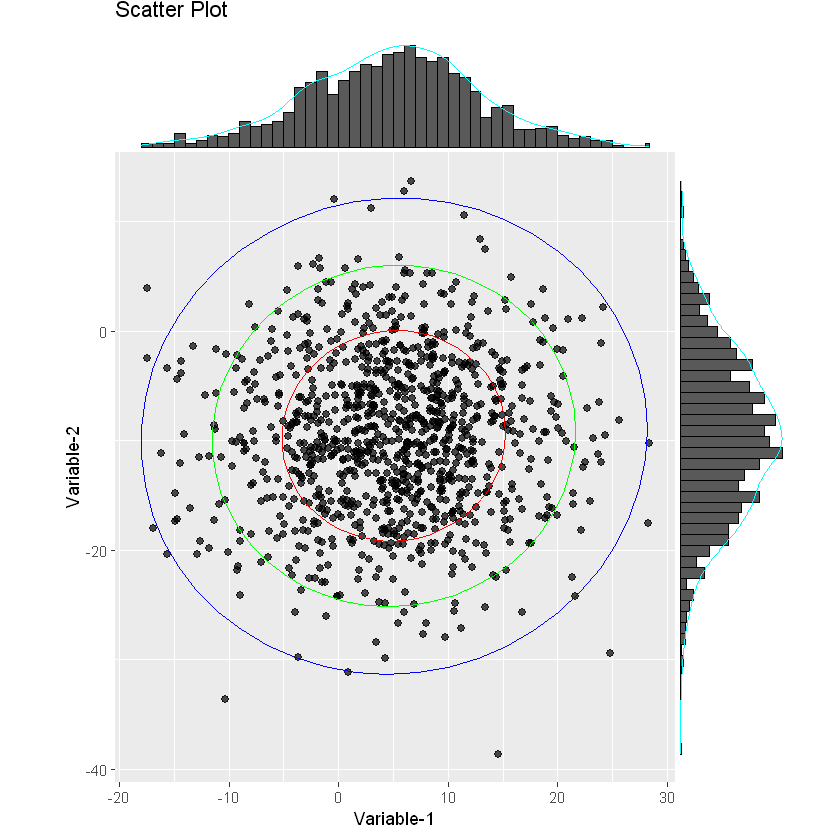

In [14]:
# Make a scatter plot with the marginal densities for any pair of variables
# in the training data

p1 = ggplot(data = df_train, aes(x = V1, y = V2)) + 
geom_point(size = 2, alpha = 0.7) + xlab("Variable-1") + 
   ylab("Variable-2") + ggtitle("Scatter Plot") +
   coord_fixed(ratio = 1) +
   stat_ellipse(level = 0.68, color = 'red')+
   stat_ellipse(level = 0.95, color = 'green')+
   stat_ellipse(level = 0.997, color = 'blue')

# Add marginal histogram plot to the scatter plot 
delta =1
ggMarginal(p1, type = 'histogram', color = 'black', binwidth = delta)

# Add marginal density plot to the scatter plot
ggMarginal(p1, type = 'density', color = 'cyan')

In [15]:
solve(cov(as.data.frame(cbind(X_train, 2*X_train[, 11]))))

ERROR: Error in solve.default(cov(as.data.frame(cbind(X_train, 2 * X_train[, : system is computationally singular: reciprocal condition number = 1.32631e-17


### **Building the Model**
- Model built using sample mean and sample covariance matrix.
- Convariance matrix is non invertible if the variables are linearly dependent.  

In [16]:
## Build model using training data 
mu_train = colMeans(X_train) # sample column mean using training data
mu_train
S_train = cov(as.data.frame(X_train)) # sample covariance matrix using training data
S_train_inverse = solve(S_train)  # inverse of sample covariance matrix from training data

# # Mahalanobis distance of training samples
M_distance_train = apply(X_train, 1, function(x){sqrt(t(x-mu_train) %*% S_train_inverse %*% (x-mu_train))})

# # Mahalanobis distance of validation samples using model built using training data
M_distance_validate = apply(X_validate, 1, function(x){sqrt(t(x-mu_train) %*% S_train_inverse %*% (x-mu_train))})

# # Add Mahalanobis distance as new column of training and validation data frame
df_train$MD = M_distance_train
df_validate$MD = M_distance_validate

head(df_validate)

[1]   4.939400  -9.637268  13.814707 -10.464489  -7.956229  10.199504
 [7]  -6.019408   7.969829  -6.253182   2.324513   8.473723

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,MD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,18.271283,-12.359268,5.000970,1.611472,1.088592,29.314410,-8.313531,36.4383382,-9.4766787,-25.9281827,7.108628,5.673373
2,-3.193070,-19.705821,6.528556,-21.570858,3.050556,23.477503,-1.133420,12.6884094,-10.9683011,-1.1986661,1.908441,3.517914
3,-5.256678,-12.918720,25.435141,-7.231568,3.647838,12.366550,-6.512076,8.7509021,-0.7687545,-3.2610945,13.729474,2.911051
4,12.953176,-10.350333,19.857858,-24.424608,3.266105,30.445294,-11.125842,12.8156288,9.3513545,-6.1136236,17.627375,4.592003
5,3.763819,-5.728187,11.400169,-17.555297,-6.246576,16.155969,-9.724758,16.9966156,-5.1686543,0.1879945,11.401234,1.613877
6,-8.701132,-5.139959,21.404200,-18.084270,-9.109825,6.903168,-3.486003,0.2738549,-7.5489155,9.0570309,2.890973,2.807131


### **Evaluating the Model**
- Model is evaluated with the help of confusion matrix
- **True Positive (TP):** Model correctly predicts the positive class.
- **False Positive (FP):** Model incorrectly predicts the positive class.
- **True Negative (TN):** Model correctly predicts the negative class.
- **False Negative (FN):** Model incorrectly predicts the negative class.

#### **Accuracy**
- Accuracy = (TP + TN)/(TP+TN+FP+FN)
- Not a good metric when the data is biased.

#### **Precision**
- Precision = TP/(TP + FP)
- Out of all the positive predictions how many were actually correct.

#### **Recall**
- Recall = TP / (TP + FN)
- How many actual positives were identified correctly.

In [17]:
## Determine cutoff probability such that we get the best performance on the validation set
## Best performance corresponds to, for example, the best F1 score (close to 1)

# Add a new column to training and validation data frame for outliers
k = ncol(X_train) # dimensions or the number of features(11)
j = 1 # vary this to change cutoff probability
cutoff_probability = 0.96 #1-(10^(-j))  #threshold for ROC curve
MD_cutoff = qchisq(cutoff_probability, k) # threshold for Mahalanobis distance
df_train$Outliers = ((df_train)^2 >= MD_cutoff)
df_validate$Outliers = ((df_validate$MD)^2 >= MD_cutoff)

# True positives
tp = sum((df_validate$Outliers == 'TRUE') & (y_validate == 1))
# False positives
fp = sum((df_validate$Outliers == 'TRUE') & (y_validate == 0))
# False negatives
fn = sum((df_validate$Outliers == 'FALSE') & (y_validate == 1))
# Precision
precision = tp / (tp + fp)
# Recall
recall = tp / (tp + fn)
# F1 score
F1 = (2 * precision * recall) / (precision + recall)
#cat(sprintf('Threshold = %f\n', threshold))
cat(sprintf('For probability cutoff = %f, \nPrecision = %f,\nRecall = %f,\nF1 score = %f,\nFraction of outliers in training data = %f\n', cutoff_probability, precision, recall, F1,mean(df_train$Outliers == 'TRUE')))

For probability cutoff = 0.960000, 
Precision = 0.777778,
Recall = 0.700000,
F1 score = 0.736842,
Fraction of outliers in training data = 0.674000


tp fp prec = 10.000000 90.000000 0.100000
tp fp prec = 10.000000 87.000000 0.103093
tp fp prec = 10.000000 80.000000 0.111111
tp fp prec = 10.000000 74.000000 0.119048
tp fp prec = 10.000000 69.000000 0.126582
tp fp prec = 10.000000 62.000000 0.138889
tp fp prec = 10.000000 55.000000 0.153846
tp fp prec = 10.000000 49.000000 0.169492
tp fp prec = 10.000000 44.000000 0.185185
tp fp prec = 10.000000 42.000000 0.192308
tp fp prec = 10.000000 38.000000 0.208333
tp fp prec = 10.000000 35.000000 0.222222
tp fp prec = 9.000000 32.000000 0.219512
tp fp prec = 9.000000 27.000000 0.250000
tp fp prec = 9.000000 23.000000 0.281250
tp fp prec = 9.000000 17.000000 0.346154
tp fp prec = 8.000000 15.000000 0.347826
tp fp prec = 8.000000 14.000000 0.363636
tp fp prec = 8.000000 10.000000 0.444444
tp fp prec = 7.000000 3.000000 0.700000


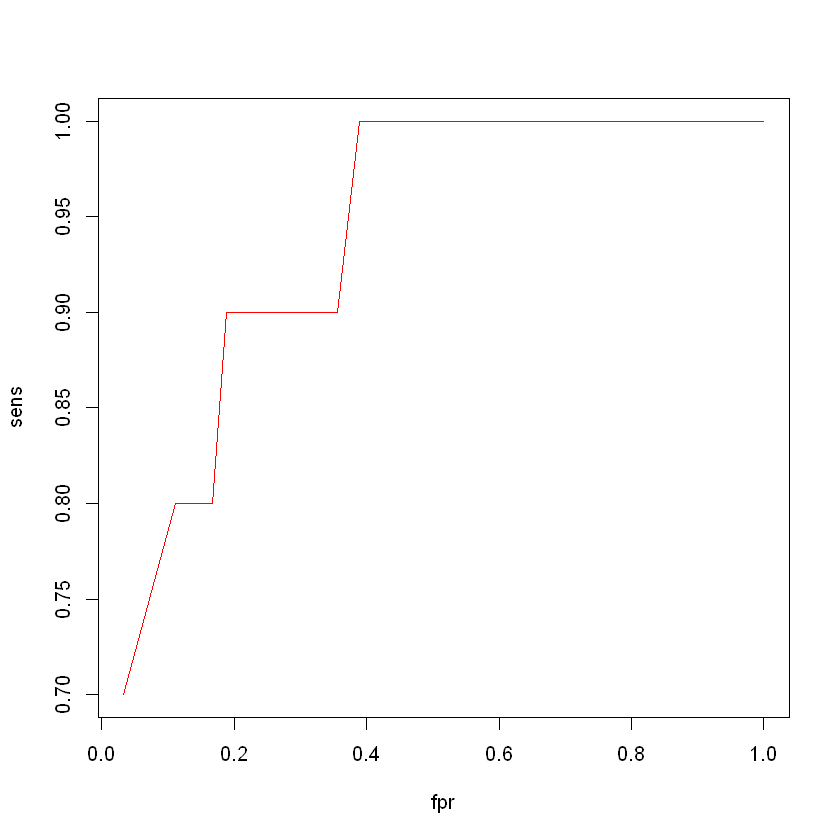

In [20]:
cutoff_probability = seq(0, 0.99, by = 0.05)
sens = c()
fpr = c()
precision = c()
recall = c()
fs = c()

for (x in cutoff_probability) {
  k = ncol(X_train)

  MD_cutoff = qchisq(x, k) # threshold for Mahalanobis distance
  df_train$Outliers = ((df_train)^2 >= MD_cutoff)
  df_validate$Outliers = ((df_validate$MD)^2 >= MD_cutoff)

  # True positives
  tp = sum((df_validate$Outliers == 'TRUE') & (y_validate == 1))
  # False positives
  fp = sum((df_validate$Outliers == 'TRUE') & (y_validate == 0))
  # False negatives
  fn = sum((df_validate$Outliers == 'FALSE') & (y_validate == 1))
  # True Negative
  tn = sum((df_validate$Outliers == 'FALSE') & (y_validate == 0))
  #cat(sprintf('thresh = %f\n', x))
  Sensitivty = tp/ (tp+fn)
  #cat(sprintf('Sensitivty = %f\n', Sensitivty))
  FPR = fp/ (tn+fp)
  # cat(sprintf('FPR = %f\n', FPR))
  Precision = tp / (tp + fp)
  Precision
  Recall = tp / (tp + fn)
  F1_score = (2*Precision*Recall)/(Precision + Recall)
  fs <- c(fs, F1_score)
  cat(sprintf('tp fp prec = %f %f %f\n', tp, fp, Precision))
  sens <- c(sens, Sensitivty)
  fpr <- c(fpr, FPR)
  precision <- c(precision, Precision)
  recall <- c(recall, Recall)
}


plot(fpr,sens,type="l",col="red")

(1) You have created a model that will identify existing customers who will potentially agree to buy a credit card from your bank. Your sales team uses your model to identify potential customers and calls them as it is not possible to call all the customers individually.

(2) You have created a model that will predict if a person will have Sternal Osteomyelitis which is a very rare disease (which I had at some point in my life!). Your medical team will test that model on the ground soon.

In each scenario, which would be more important: precision or recall? 

- Scenario 1 :  We don't want to misclassify potential buyer as someone who wouldn't buy credit card. So in this scenario model with high recall is preferred.
- Low precision would imply that we would be spending our resources on people who aren't interested in buying the credit card.
- Low recall would mean that we are losing potential customers because of misclassification.

- Scenario 2 : In this scenario we want a model with high recall so that it does not misclassify person with rare disease.
- Many number of people who have rare disease may be classified as not sick if model has low recall.
- Low precision would mean that only small fraction of people for whom the test result is positive will actually have the disease.